# Vocabulary size 변경해서 시도
#### 머신러닝을 이용한 텍스트 분류
#### 텍스트 분류(Text Classification)
주어진 텍스트를 사전 정의된 클래스(Pre-defined Class)들로 분류하는 자연어 처리 태스크

## 데이터 확인 및 복원

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### 훈련 데이터와 테스트 데이터 로드

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

- num_words
이 데이터에서 빈도수 기준으로 상위 몇 번째 단어까지 사용할 것인지 조절
- test_spilt = 0.2
전체 데이터 중에서 80%를 훈련 데이터, 20%를 테스트 데이터로 사용한다는 의미

In [3]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


### 데이터 출력

In [4]:
print(x_train[0])
print(x_test[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 23406, 28185, 5, 192,

In [5]:
print(y_train[0])
print(y_test[0])

3
3


In [6]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


### 데이터 분포 확인

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


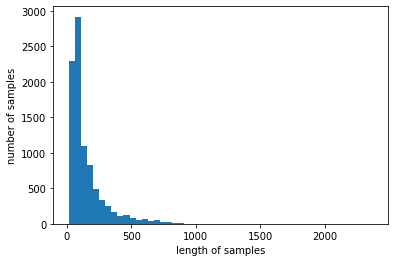

In [7]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

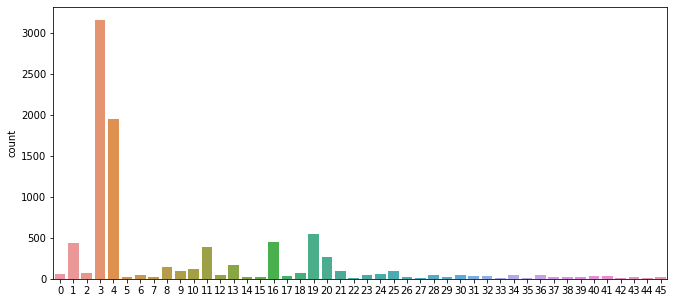

In [8]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [9]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


### 원본 뉴스 데이터로 복원
정수 시퀀스로 변환된 데이터를 다시 텍스트로

In [10]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

=3


In [11]:
word_index['the']

1

word_index 안에 단어를 입력하면 이 단어가 어떤 정수와 맵핑이 되는지를 알 수 있다

뉴스 데이터 안에서 단어 'the'는 사실 1번이 아니라 4번 단어

word_index에 입력으로 했을 때, 얻는 숫자보다는 +3을 한 숫자가 원래 고유한 숫자

reuters.get_word_index에는 실제 단어에 맵핑 한 정수에 -3을 한 정수를 입력해 놓음

그렇기 때문에 word_index에서 index_word를 만들 때, 각 정수에 +3을 해야함

In [12]:
index_to_word = { index+3 : word for word, index in word_index.items() }

In [13]:
print(index_to_word[4])
print(index_to_word[16])

the
it


0번, 1번, 2번은 사실 각각 <pad>, <sos>, <unk>라는 자연어 처리를 위한 특별한 토큰들을 위해 맵핑된 번호
    
index_to_word에 추가적으로 이 작업을 해주어야 진짜 index_to_word가 완성

In [14]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [15]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


### OOV(Out-Of-Vocabulary) 문제와 UNK(Unknown) 토큰
기계가 미처 배우지 못한 모르는 단어

전체 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환

In [16]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [17]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


제대로 변환이 되었는지 확인

In [18]:
x_train[:5]

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3",
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect th

In [19]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman arsenio yulo said yu

## 벡터화 하기

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

DTM은 사이킷런의 CountVectorizer()를 통해서 생성할 수 있

In [21]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


TF-IDF Matrix는 추가적인 전처리를 하지 않는 이상, DTM과 동일한 크기를 가집

In [22]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


In [23]:
# 정확도 측정을 위해 테스트 데이터 전처리 필요, 이에 테스트 데이터 TF-IDF  행렬로 변환 필요

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

## 나이브 베이즈 분류기
나이브 베이즈 분류기는 사이킷런의 MultinomialNB()를 통해 사용할 수 있다

사이킷런이 제공하는 머신러닝 모델들은 공통적으로 fit()이라는 함수를 제공

훈련 데이터와 해당 훈련 데이터에 대한 레이블을 인자로 사용하면 모델이 이를 학습

In [24]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

### 1) Naive Bayes Classifier(NB)

In [25]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

테스트 데이터도 TF-IDF 행렬로 변환. 그 후 해당 행렬과 predict() 함수를 통해 예측값을 얻어 정확도를 측정

In [26]:
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.5997328584149599


In [27]:
x_test[3]

'<sos> graham mccormick oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north rucias fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to prepay principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the noteholders exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3'

In [28]:
y_test[3]

4

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [30]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      0.18      0.29        99
          17       0.00    

- macro: 단순평균
- weighted: 각 클래스에 속하는 표본의 개수로 가중평균
- accuracy: 정확도. 전체 학습 데이터의 개수에서 클래스를 정확하게 맞춘 개수의 비율

나이브 베이지안 분류기는 독립 변수가 '조건부로 독립적'이라는 가정을 하기 때문에, 문서가 특정 분류에 속할 실제 확률을 사용할 때 문제가 발생할 수 있다. 예를 들어 많은 샘플(sample)이 특정 클래스에 치우쳐져 있을 경우, 결정 경계의 가중치가 한쪽으로 치우쳐져 모델이 특정 클래스를 선호하는 경우가 발생
### 2) Complement Naive Bayes Classifier(CNB)
데이터가 불균형할 경우를 대비해 나이브 베이즈 분류기를 보완한 것이 컴플리먼트 나이브 베이즈 분류기

컴플리먼트 나이브 베이즈 분류기는 데이터의 불균형을 고려하여 가중치를 부여하는 특징을 가지고 있다

In [31]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [32]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7649154051647373


### 3) 로지스틱 회귀(Logistic Regression)
로지스틱 회귀는 소프트맥스(softmax) 함수를 사용한 다중 클래스 분류 알고리즘을 지원

다중 클래스 분류를 위한 로지스틱 회귀를 소프트맥스 회귀(Softmax Regression)라고도 함

주의할 점은 이름은 회귀지만, 실제로는 분류를 수행한다는 점

In [33]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=10000)

In [34]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.813446126447017


### 4) 선형 서포트 벡터 머신(Linear Support Vector Machine)
서포트 벡터 머신(SVM)은 대표적인 선형 분류 알고리즘

- 서포트 벡터 머신에서 서포트 벡터란?
Decision Boundary와 가장 가까운 각 클래스의 데이터를 서포트 벡터라고 한다

주의! Decision Boundary에 해당되는 벡터가 아님

In [35]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [36]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7853962600178095


### 5) 결정 트리(Decision Tree)
결정 트리는 분류와 회귀 문제에 널리 사용하는 모델

기본적으로 결정 트리는 결정에 다다르기 위해 '예/아니오' 질문을 이어 나가면서 학습 스무고개 놀이의 질문과 비슷

결정 트리의 깊이는 max_depth라는 인자를 통해서 정해줄 수 있

In [37]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [38]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6211041852181657


### 6) 랜덤 포레스트(Random Forest)
앙상블(Ensemble)이란 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법

랜덤 포레스트와 그래디언트 부스팅 트리는 결정 트리를 사용하는 앙상블 모델

In [39]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [40]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6544968833481746


### 7) 그래디언트 부스팅 트리(GradientBoostingClassifier)
그래디언트 부스팅 트리는 여러 개의 결정 트리를 묶어 만드는 앙상블 모델

랜덤 포레스트와 다르게 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다
- 1 ~ 5 정도의 깊지 않은 트리를 사용하므로 메모리도 적게 사용하고 예측도 빠름
- 정확도도 준수하고, 특히 예측 속도가 빠르다는 점에서 데이터 경진 대회에서 많은 우승을 했던 모델
- 훈련 시간의 속도가 좀 오래 걸리고, 트리 기반 모델의 특성으로 인해서 희소한 고차원 데이터에 대해서는 잘 동작하지 않는다는 단점

## 2. 빈도수 상위 5,000개의 단어만 사용

In [41]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [42]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [43]:
index_to_word = { index+3 : word for word, index in word_index.items() }

In [44]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [45]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [46]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [47]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [48]:
x_train[:1]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3']

In [49]:
x_test[:1]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3']

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [51]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 4867)


In [52]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 4867)


In [53]:
x_test_dtm = dtmvector.transform(x_test)
tfidfv_test = tfidf_transformer.transform(x_test_dtm)

### 1) Naive Bayes Classifier(NB)

In [54]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [55]:
predicted = model.predict(tfidfv_test)
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.6731967943009796


### 2) Complement Naive Bayes Classifier(CNB)

In [56]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [57]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


### 3) 로지스틱 회귀(Logistic Regression)

In [58]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=10000)

In [59]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8058771148708815


### 4) 선형 서포트 벡터 머신(Linear Support Vector Machine)

In [60]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [61]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7711487088156723


### 5) 의사 결정 트리(Decision Tree)

In [62]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [63]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6179875333926982


### 6) 랜덤 포레스트(Random Forest)

In [64]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [65]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.701246660730187


## 3. 직접 단어 개수를 설정해서 사용

### 3-1 n_words = 3000

In [66]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=3000, test_split=0.2)

In [67]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [68]:
index_to_word = { index+3 : word for word, index in word_index.items() }

In [69]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [70]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of <unk> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <unk> operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [71]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [72]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [73]:
x_train[:1]

['<sos> <unk> <unk> said as a result of its december acquisition of <unk> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <unk> operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3']

In [74]:
x_test[:1]

['<sos> the great atlantic and pacific <unk> co said its three year <unk> mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations <unk> 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3']

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [76]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 2919)


In [77]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 2919)


In [78]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

### 1) Naive Bayes Classifier(NB)

In [79]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [80]:
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측값을 얻어 정확도 측정
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6874443455031166


### 2) Complement Naive Bayes Classifier(CNB)

In [81]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [82]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7644701691896705


### 3) 로지스틱 회귀(Logistic Regression)

In [83]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=10000)

In [84]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.794746215494212


### 4) 선형 서포트 벡터 머신(Linear Support Vector Machine)

In [85]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [86]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7524487978628673


### 5) 의사 결정 트리(Decision Tree)

In [87]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [88]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6260017809439002


### 6) 랜덤 포레스트(Random Forest)

In [89]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [90]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6856634016028496


### 3-2 n_words = 1000

In [91]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [92]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [93]:
index_to_word = { index+3 : word for word, index in word_index.items() }

In [94]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [95]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of <unk> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <unk> <unk> revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash <unk> per share this year should be 2 50 to three dlrs reuter 3


In [96]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [97]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [98]:
x_train[:1]

['<sos> <unk> <unk> said as a result of its december acquisition of <unk> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <unk> <unk> revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash <unk> per share this year should be 2 50 to three dlrs reuter 3']

In [99]:
x_test[:1]

['<sos> the <unk> <unk> and pacific <unk> co said its three year <unk> mln dlr capital program will be be <unk> increased to <unk> growth and <unk> plans for <unk> inc and <unk> inc over the next two years a and <unk> said the acquisition of <unk> in august 1986 and <unk> in december <unk> us <unk> better than expected results in the fourth quarter ended february 28 its net income from continuing operations <unk> 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and <unk> gave no details on the <unk> capital program but it did say it completed the first year of the program during 1986 a and <unk> is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3']

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [101]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 969)


In [102]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 969)


In [103]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

### 1) Naive Bayes Classifier(NB)

In [104]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [105]:
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측값을 얻어 정확도 측정
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6856634016028496


### 2) Complement Naive Bayes Classifier(CNB)

In [106]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [107]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7346393588601959


### 3) 로지스틱 회귀(Logistic Regression)

In [108]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=10000)

In [109]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.780053428317008


### 4) 선형 서포트 벡터 머신(Linear Support Vector Machine)

In [110]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [111]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7181656277827249


### 5) 의사 결정 트리(Decision Tree)

In [112]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [113]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6179875333926982


### 6) 랜덤 포레스트(Random Forest)

In [114]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [115]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.707479964381122


### 3-3 n_words = 8000

In [116]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=8000, test_split=0.2)

In [117]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [118]:
index_to_word = { index+3 : word for word, index in word_index.items() }

In [119]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [120]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [121]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [122]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [123]:
x_train[:1]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3']

In [124]:
x_test[:1]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3']

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [126]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 7772)


In [127]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 7772)


In [128]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

### 1) Naive Bayes Classifier(NB)

In [129]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [130]:
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측값을 얻어 정확도 측정
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6625111308993766


### 2) Complement Naive Bayes Classifier(CNB)

In [131]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [132]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


### 3) 로지스틱 회귀(Logistic Regression)

In [133]:
lr = LogisticRegression(C=10000, penalty='l2')  #학습이 과대적합 되는 것을 방지하고자 일종의 penalty를 부여 https://greatjoy.tistory.com/58
lr.fit(tfidfv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=10000)

In [134]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8098842386464826


### 4) 선형 서포트 벡터 머신(Linear Support Vector Machine)

In [135]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [136]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7689225289403384


### 5) 의사 결정 트리(Decision Tree)

In [137]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [138]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6206589492430988


### 6) 랜덤 포레스트(Random Forest)

In [139]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [140]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6669634906500446


### 분류성능평가지표
Precision(정밀도), Recall(재현율) and Accuracy(정확도)
#### Precision(정밀도)
- 정밀도란 모델이 True라고 분류한 것 중에서 실제 True인 것의 비율
- Positive 정답률, PPV(Positive Predictive Value)라고도 불립니다.
- 예를 들어, 날씨 예측 모델이 맑다로 예측했는데, 실제 날씨가 맑았는지를 살펴보는 지표

#### Recall(재현율)
- 재현율이란 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율
- 통계학에서는 sensitivity으로, 그리고 다른 분야에서는 hit rate라는 용어로도 사용
- 정밀도(Precision)와 True Positive의 경우를 다르게 바라보는 것
- 예를 들어, 실제 날씨가 맑은 날 중에서 모델이 맑다고 예측한 비율을 나타낸 지표
- 실제 정답(data)의 입장에서 정답을 정답이라고 맞춘 경우를 바라보고 있음

#### Precision-Recall Trade-off

#### Accuracy(정확도)
- True를 True라고 옳게 예측한 경우에 대해서만 다룸
- False를 False라고 예측한 경우도 옳은 경우
(이러한 경우를 다른 지표가 정확도(Accuracy))

#### F1 score
- F1 score는 Precision과 Recall의 조화평균
- 데이터 label이 불균형 구조일 때, 모델의 성능을 정확하게 평가할 수 있고, 성능을 하나의 숫자로 표현할 수 있다

### Confusion Matrix
알고리즘 성능 평가에 사용
- TP : True로 예측하고 실제 값도 True
- TN : False로 예측하고 실제 값도 False
- FP : True로 예측하고 실제는 False
- FN : False로 예측하고 실제는 True


- Accuarcy _ 전체 중 맞게 맞게 예측한 비율
- Precision _ Positive에 속하는 것들 중 실제 Positvie 인것
- Recall (sensitivty) _ 실제로 Positive인 것들 중 Positive로 예측한 비율
- Specificity _ Negative에 속하는 것들 중 실제 Negative 인것
- F1 Measure _ 위의 Precision과 Recall을 이용

### 다양한 머신러닝 모델
#### Complement Naive Bayes Classifier(CNB)
데이터가 불균형할 경우를 대비해 나이브 베이즈 분류기를 보완한 것이 컴플리먼트 나이브 베이즈 분류기

컴플리먼트 나이브 베이즈 분류기는 데이터의 불균형을 고려하여 가중치를 부여하는 특징을 가지고 있다
#### 로지스틱 회귀(Logistic Regression)
로지스틱 회귀는 소프트맥스(softmax) 함수를 사용한 다중 클래스 분류 알고리즘을 지원

다중 클래스 분류를 위한 로지스틱 회귀를 소프트맥스 회귀(Softmax Regression)라고도 함

주의할 점은 이름은 회귀지만, 실제로는 분류를 수행한다는 점
#### 선형 서포트 벡터 머신(Linear Support Vector Machine)
서포트 벡터 머신(SVM)은 대표적인 선형 분류 알고리즘

- 서포트 벡터 머신에서 서포트 벡터란?
Decision Boundary와 가장 가까운 각 클래스의 데이터를 서포트 벡터라고 한다

주의! Decision Boundary에 해당되는 벡터가 아님
#### 결정 트리(Decision Tree)
결정 트리는 분류와 회귀 문제에 널리 사용하는 모델

기본적으로 결정 트리는 결정에 다다르기 위해 '예/아니오' 질문을 이어 나가면서 학습 스무고개 놀이의 질문과 비슷
#### 랜덤 포레스트(Random Forest)
앙상블(Ensemble)이란 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법

랜덤 포레스트와 그래디언트 부스팅 트리는 결정 트리를 사용하는 앙상블 모델
#### 그래디언트 부스팅 트리(GradientBoostingClassifier)
그래디언트 부스팅 트리는 여러 개의 결정 트리를 묶어 만드는 앙상블 모델

랜덤 포레스트와 다르게 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다
- 1 ~ 5 정도의 깊지 않은 트리를 사용하므로 메모리도 적게 사용하고 예측도 빠름
- 정확도도 준수하고, 특히 예측 속도가 빠르다는 점에서 데이터 경진 대회에서 많은 우승을 했던 모델
- 훈련 시간의 속도가 좀 오래 걸리고, 트리 기반 모델의 특성으로 인해서 희소한 고차원 데이터에 대해서는 잘 동작하지 않는다는 단점
#### 보팅(Voting)
투표를 통해 결과를 도출
- 소프트보팅 _ 최종 결과물이 나올 확률값을 다 더해서 최종 결과물에 대한 각각의 확률을 구한 뒤 최종값을 도출
- 하드보팅 _ (투표용지를 하나씩 발급하는 방식) 최종 투표의 결과를 더한 뒤 최종값 도출